##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE231535**

file previously downloaded:
GSE231535_RAW.tar

unzipped using 
``` bash
tar -xvf GSE231535_RAW.tar
```

This gives the following files:                         
* GSM7289739_PDAC1_barcodes.tsv.gz
* GSM7289739_PDAC1_genes.tsv.gz
* GSM7289739_PDAC1_matrix.mtx.gz
* GSM7289740_PDAC2_barcodes.tsv.gz
* GSM7289740_PDAC2_genes.tsv.gz
* GSM7289740_PDAC2_matrix.mtx.gz

Files organised in to correct folders and file names

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE231535')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE231535"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
#load all datasets
PDAC1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE231535/PDAC1")
PDAC2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE231535/PDAC2")

In [4]:
#Add dataset info to colnames
colnames(PDAC1.data) <- paste0("GSE231535_PDAC1_", colnames(PDAC1.data))
colnames(PDAC2.data) <- paste0("GSE231535_PDAC2_", colnames(PDAC2.data))

In [5]:
head(colnames(PDAC1.data))
head(colnames(PDAC2.data))

[1] "GSE231535_PDAC1_AAACCTGAGACGCACA-1" "GSE231535_PDAC1_AAACCTGAGGCATGGT-1"
[3] "GSE231535_PDAC1_AAACCTGAGGCATGTG-1" "GSE231535_PDAC1_AAACCTGCAATAACGA-1"
[5] "GSE231535_PDAC1_AAACCTGCAGGTGCCT-1" "GSE231535_PDAC1_AAACCTGGTCAGTGGA-1"

[1] "GSE231535_PDAC2_AAACCTGAGAATGTTG-1" "GSE231535_PDAC2_AAACCTGAGTCGTTTG-1"
[3] "GSE231535_PDAC2_AAACCTGCACCGTTGG-1" "GSE231535_PDAC2_AAACCTGCACGTTGGC-1"
[5] "GSE231535_PDAC2_AAACCTGCAGATAATG-1" "GSE231535_PDAC2_AAACCTGCAGGCTGAA-1"

In [6]:
#create seperate seurat object for each sample
PDAC1 <- CreateSeuratObject(counts = PDAC1.data, project = "GSE231535", min.features = 200)
#add metadata to sample
PDAC1@meta.data$sample_type <- "tumour"
PDAC1@meta.data$cancer_type <- "PDAC"
PDAC1@meta.data$patient_id <- "PDAC1"
PDAC1@meta.data$sample_id <- "GSE231535_PDAC1"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [7]:
#create seperate seurat object for each sample
PDAC2 <- CreateSeuratObject(counts = PDAC2.data, project = "GSE231535", min.features = 200)
#add metadata to sample
PDAC2@meta.data$sample_type <- "tumour"
PDAC2@meta.data$cancer_type <- "PDAC"
PDAC2@meta.data$patient_id <- "PDAC2"
PDAC2@meta.data$sample_id <- "GSE231535_PDAC2"

In [8]:
head(PDAC1@meta.data) 
head(PDAC2@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE231535_PDAC1_AAACCTGAGACGCACA-1 GSE231535  1838        668        
GSE231535_PDAC1_AAACCTGAGGCATGGT-1 GSE231535  7799       2041        
GSE231535_PDAC1_AAACCTGAGGCATGTG-1 GSE231535  2589        895        
GSE231535_PDAC1_AAACCTGCAATAACGA-1 GSE231535  3585       1333        
GSE231535_PDAC1_AAACCTGCAGGTGCCT-1 GSE231535  4576       1167        
GSE231535_PDAC1_AAACCTGGTCAGTGGA-1 GSE231535  2297        723        
                                   sample_type cancer_type patient_id
GSE231535_PDAC1_AAACCTGAGACGCACA-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGAGGCATGGT-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGAGGCATGTG-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGCAATAACGA-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGCAGGTGCCT-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGGTCAGTGGA-1 tumour      PDAC        PDAC1     
                                   sample_id      
GSE231535_PDAC1_AAACCTGAGACGCACA-1 GSE231535_PDAC1
GSE231535_PDAC1_AAACCTGAGGCATGGT-1 GSE231535_PDAC1
GSE231535_PDAC1_AAACCTGAGGCATGTG-1 GSE231535_PDAC1
GSE231535_PDAC1_AAACCTGCAATAACGA-1 GSE231535_PDAC1
GSE231535_PDAC1_AAACCTGCAGGTGCCT-1 GSE231535_PDAC1
GSE231535_PDAC1_AAACCTGGTCAGTGGA-1 GSE231535_PDAC1

orig.ident nCount_RNA nFeature_RNA
GSE231535_PDAC2_AAACCTGAGAATGTTG-1 GSE231535   994        548        
GSE231535_PDAC2_AAACCTGAGTCGTTTG-1 GSE231535  3801       1532        
GSE231535_PDAC2_AAACCTGCACCGTTGG-1 GSE231535  1126        634        
GSE231535_PDAC2_AAACCTGCACGTTGGC-1 GSE231535  1990       1052        
GSE231535_PDAC2_AAACCTGCAGATAATG-1 GSE231535  2601       1260        
GSE231535_PDAC2_AAACCTGCAGGCTGAA-1 GSE231535   671        424        
                                   sample_type cancer_type patient_id
GSE231535_PDAC2_AAACCTGAGAATGTTG-1 tumour      PDAC        PDAC2     
GSE231535_PDAC2_AAACCTGAGTCGTTTG-1 tumour      PDAC        PDAC2     
GSE231535_PDAC2_AAACCTGCACCGTTGG-1 tumour      PDAC        PDAC2     
GSE231535_PDAC2_AAACCTGCACGTTGGC-1 tumour      PDAC        PDAC2     
GSE231535_PDAC2_AAACCTGCAGATAATG-1 tumour      PDAC        PDAC2     
GSE231535_PDAC2_AAACCTGCAGGCTGAA-1 tumour      PDAC        PDAC2     
                                   sample_id      
GSE231535_PDAC2_AAACCTGAGAATGTTG-1 GSE231535_PDAC2
GSE231535_PDAC2_AAACCTGAGTCGTTTG-1 GSE231535_PDAC2
GSE231535_PDAC2_AAACCTGCACCGTTGG-1 GSE231535_PDAC2
GSE231535_PDAC2_AAACCTGCACGTTGGC-1 GSE231535_PDAC2
GSE231535_PDAC2_AAACCTGCAGATAATG-1 GSE231535_PDAC2
GSE231535_PDAC2_AAACCTGCAGGCTGAA-1 GSE231535_PDAC2

In [9]:
#Merge seurat objects
PDAC <- merge(PDAC1, y = c(PDAC2), project = "GSE231535")

In [10]:
PDAC
head(PDAC@meta.data)
tail(PDAC@meta.data)

An object of class Seurat 
45068 features across 16039 samples within 1 assay 
Active assay: RNA (45068 features, 0 variable features)
 2 layers present: counts.1, counts.2

orig.ident nCount_RNA nFeature_RNA
GSE231535_PDAC1_AAACCTGAGACGCACA-1 GSE231535  1838        668        
GSE231535_PDAC1_AAACCTGAGGCATGGT-1 GSE231535  7799       2041        
GSE231535_PDAC1_AAACCTGAGGCATGTG-1 GSE231535  2589        895        
GSE231535_PDAC1_AAACCTGCAATAACGA-1 GSE231535  3585       1333        
GSE231535_PDAC1_AAACCTGCAGGTGCCT-1 GSE231535  4576       1167        
GSE231535_PDAC1_AAACCTGGTCAGTGGA-1 GSE231535  2297        723        
                                   sample_type cancer_type patient_id
GSE231535_PDAC1_AAACCTGAGACGCACA-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGAGGCATGGT-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGAGGCATGTG-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGCAATAACGA-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGCAGGTGCCT-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGGTCAGTGGA-1 tumour      PDAC        PDAC1     
                                   sample_id      
GSE231535_PDAC1_AAACCTGAGACGCACA-1 GSE231535_PDAC1
GSE231535_PDAC1_AAACCTGAGGCATGGT-1 GSE231535_PDAC1
GSE231535_PDAC1_AAACCTGAGGCATGTG-1 GSE231535_PDAC1
GSE231535_PDAC1_AAACCTGCAATAACGA-1 GSE231535_PDAC1
GSE231535_PDAC1_AAACCTGCAGGTGCCT-1 GSE231535_PDAC1
GSE231535_PDAC1_AAACCTGGTCAGTGGA-1 GSE231535_PDAC1

orig.ident nCount_RNA nFeature_RNA
GSE231535_PDAC2_TTTGTCATCCGCAAGC-1 GSE231535  2690       1111        
GSE231535_PDAC2_TTTGTCATCCTGTACC-1 GSE231535  5634       2227        
GSE231535_PDAC2_TTTGTCATCGAGGTAG-1 GSE231535  2450       1280        
GSE231535_PDAC2_TTTGTCATCTCAACTT-1 GSE231535  3730       1507        
GSE231535_PDAC2_TTTGTCATCTCCAGGG-1 GSE231535  7708       2928        
GSE231535_PDAC2_TTTGTCATCTGATACG-1 GSE231535  3794       1489        
                                   sample_type cancer_type patient_id
GSE231535_PDAC2_TTTGTCATCCGCAAGC-1 tumour      PDAC        PDAC2     
GSE231535_PDAC2_TTTGTCATCCTGTACC-1 tumour      PDAC        PDAC2     
GSE231535_PDAC2_TTTGTCATCGAGGTAG-1 tumour      PDAC        PDAC2     
GSE231535_PDAC2_TTTGTCATCTCAACTT-1 tumour      PDAC        PDAC2     
GSE231535_PDAC2_TTTGTCATCTCCAGGG-1 tumour      PDAC        PDAC2     
GSE231535_PDAC2_TTTGTCATCTGATACG-1 tumour      PDAC        PDAC2     
                                   sample_id      
GSE231535_PDAC2_TTTGTCATCCGCAAGC-1 GSE231535_PDAC2
GSE231535_PDAC2_TTTGTCATCCTGTACC-1 GSE231535_PDAC2
GSE231535_PDAC2_TTTGTCATCGAGGTAG-1 GSE231535_PDAC2
GSE231535_PDAC2_TTTGTCATCTCAACTT-1 GSE231535_PDAC2
GSE231535_PDAC2_TTTGTCATCTCCAGGG-1 GSE231535_PDAC2
GSE231535_PDAC2_TTTGTCATCTGATACG-1 GSE231535_PDAC2

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


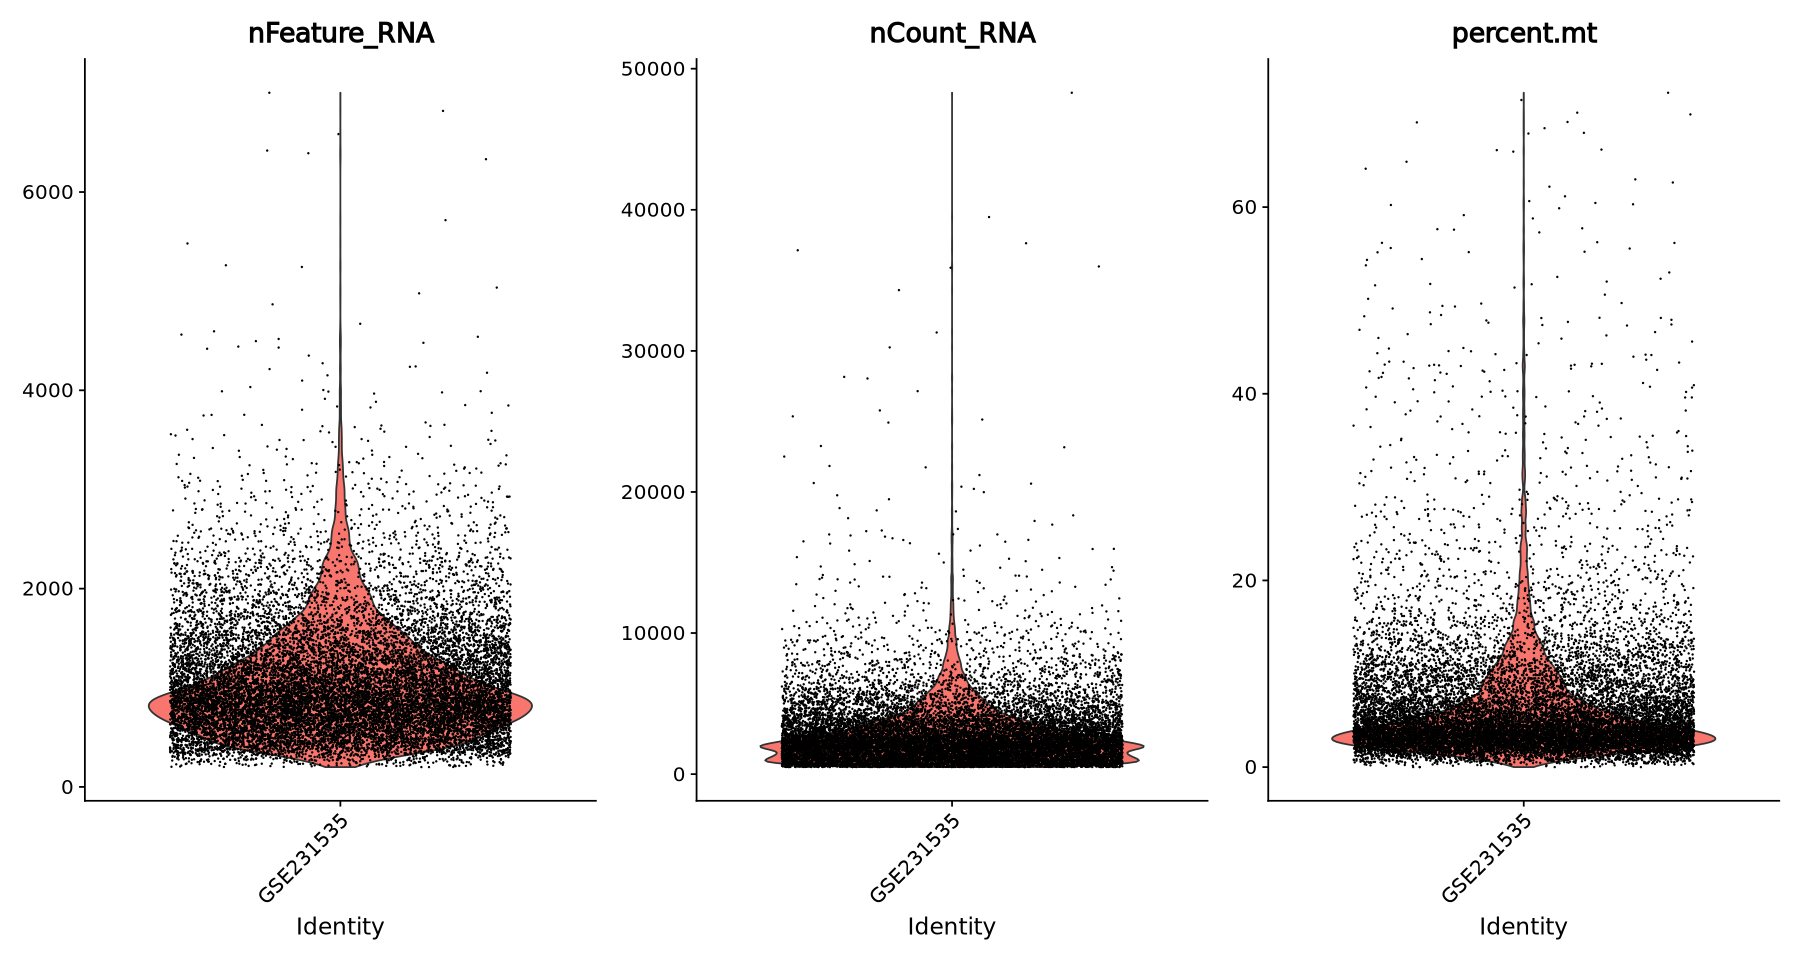

In [11]:
#QC Steps 
PDAC[["percent.mt"]] <- PercentageFeatureSet(PDAC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(PDAC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [13]:
#Normalise the data
PDAC <- NormalizeData(PDAC)
#Find variable features
PDAC <- FindVariableFeatures(PDAC, selection.method = "vst", nfeatures = 2000)
#Scale the data
PDAC <- ScaleData(PDAC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run PCA
PDAC <- RunPCA(PDAC, features = VariableFeatures(object = PDAC))

Normalizing layer: counts.1



Normalizing layer: counts.2

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  SPINK1, KRT19, CD24, TSPAN8, C19orf33, ELF3, KRT8, MMP7, KRT18, TMC5 
	   SLPI, FXYD3, CYSTM1, ATP1B1, CEACAM6, GPX2, ANXA4, LGALS4, LCN2, SMIM22 
	   PIGR, AGR2, TM4SF4, OCIAD2, MUC1, TFF1, BIRC3, TM4SF1, SPINT2, CXCL3 
Negative:  COL1A2, DCN, COL3A1, SPARC, LUM, COL1A1, LGALS1, CALD1, COL6A3, BGN 
	   COL5A2, MMP2, CCDC80, COL6A2, C1R, SERPINF1, FN1, VIM, RARRES2, INHBA 
	   AEBP1, TPM2, SFRP2, CTHRC1, MT2A, THBS2, COL5A1, C1S, VCAN, FSTL1 
PC_ 2 
Positive:  COL1A2, LUM, DCN, COL1A1, COL3A1, RARRES2, CCDC80, COL6A3, TPM1, BGN 
	   S100A6, C1S, C1R, COL5A2, SFRP2, TPM2, SERPINF1, CYR61, CTHRC1, THY1 
	   PCOLCE, COL5A1, TAGLN, AEBP1, THBS2, FBLN1, VCAN, COL6A2, MMP2, PALLD 
Negative:  HLA-DRB1, SRGN, HLA-DRA, CD74, HLA-DPA1, PECAM1, HLA-DPB1, CLDN5, PLVAP, FABP5 
	   TYROBP, 

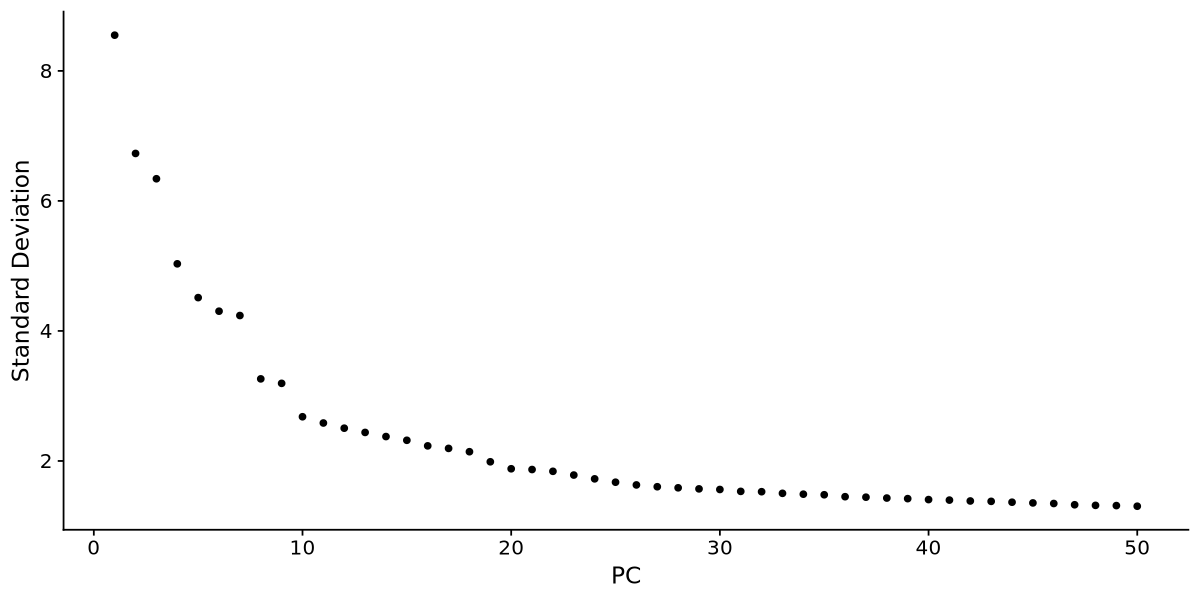

In [14]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(PDAC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [15]:
#Find neighbours (make sure number matches no. features chosen above)
PDAC <- FindNeighbors(PDAC, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [16]:
#Run UMAP
PDAC <- RunUMAP(PDAC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:54:54 UMAP embedding parameters a = 0.9922 b = 1.112

12:54:54 Read 16039 rows and found 40 numeric columns

12:54:54 Using Annoy for neighbor search, n_neighbors = 30

12:54:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:54:55 Writing NN index file to temp file /scratch/temp/9337544/RtmpO9MbWE/file42db61cc48d19

12:54:55 Searching Annoy index using 1 thread, search_k = 3000

12:55:03 Annoy recall = 100%

12:55:04 Commencing smooth kNN distance calibration using 1 thread
 with t

In [17]:
#Cluster, resolution here set to 0.2
PDAC <- FindClusters(PDAC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16039
Number of edges: 612051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9674
Number of communities: 15
Elapsed time: 5 seconds


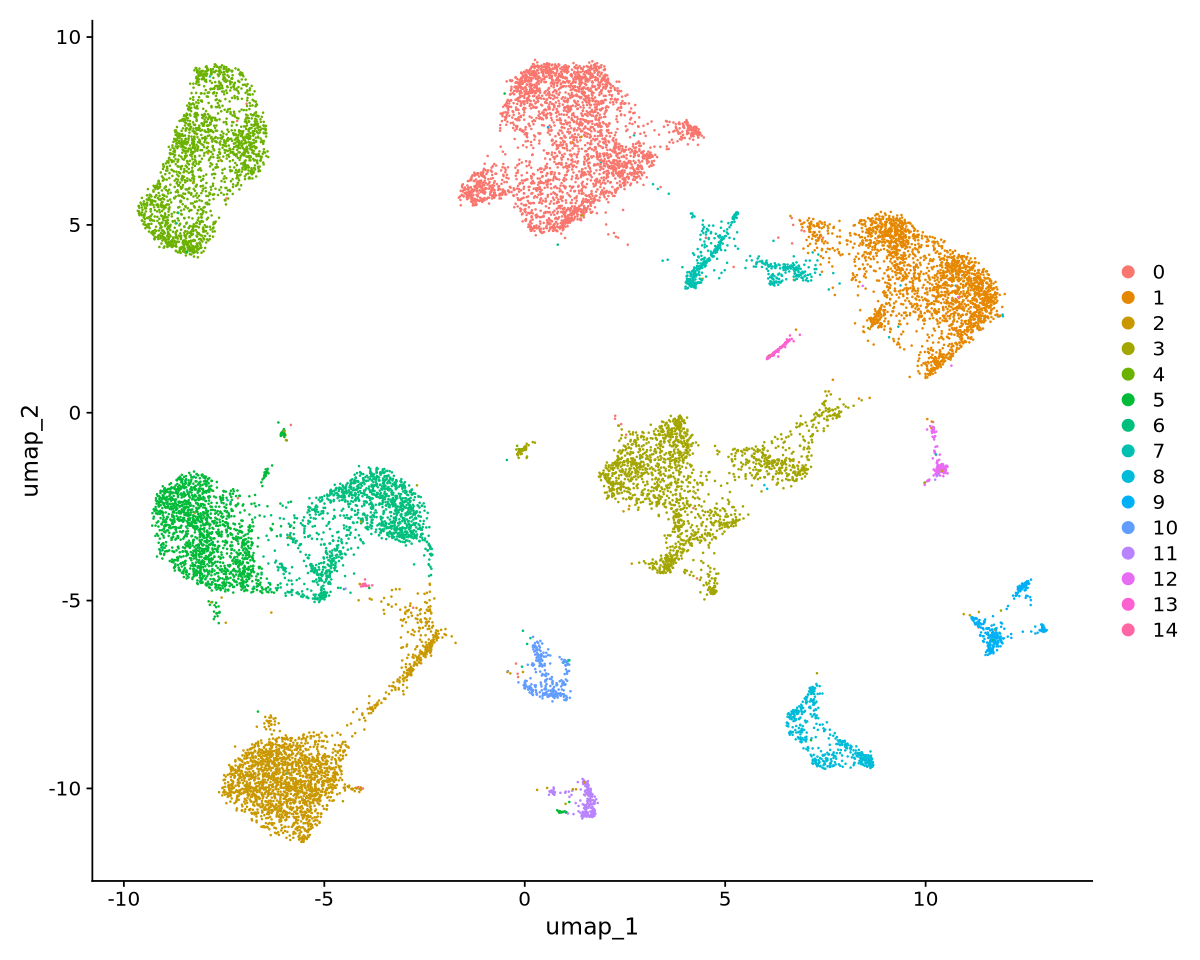

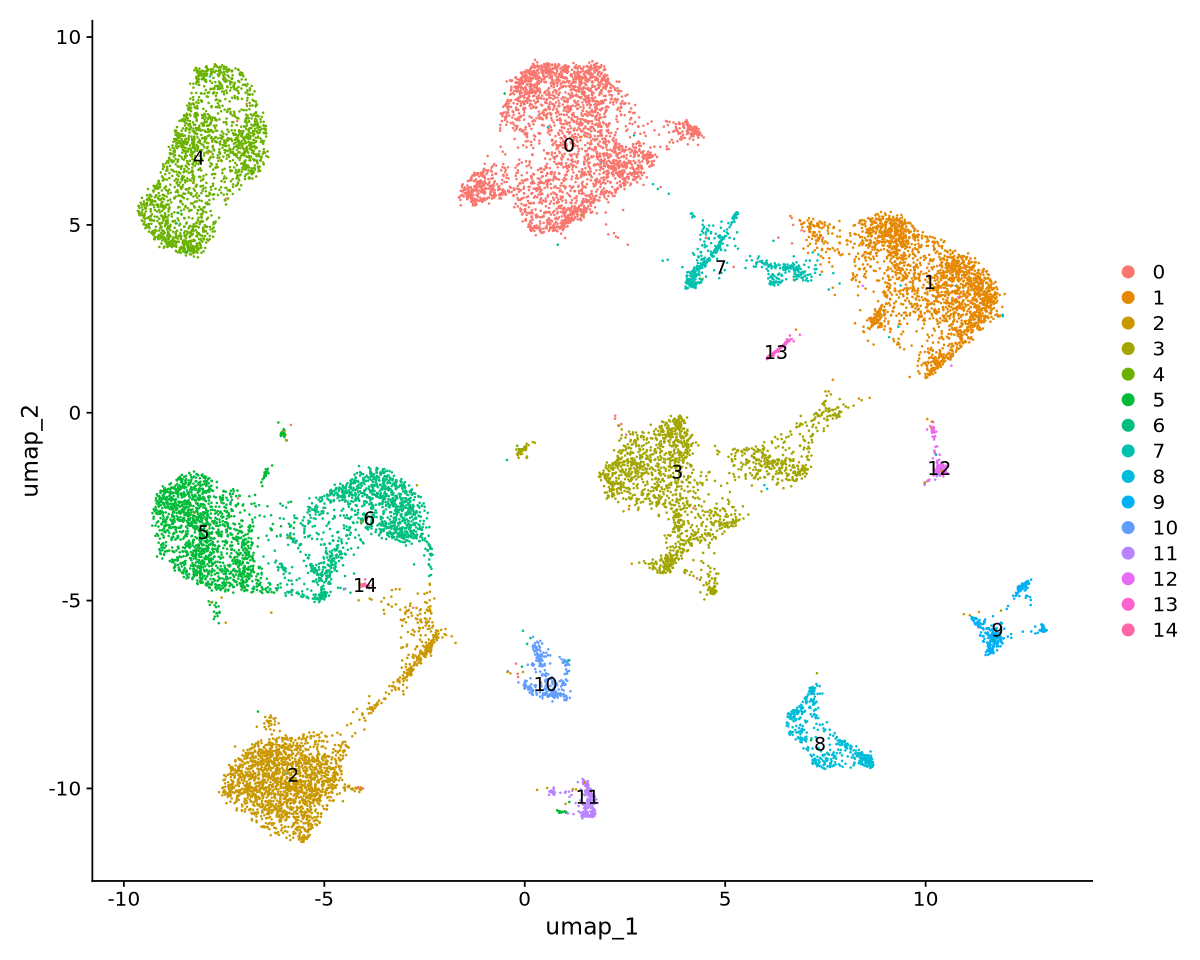

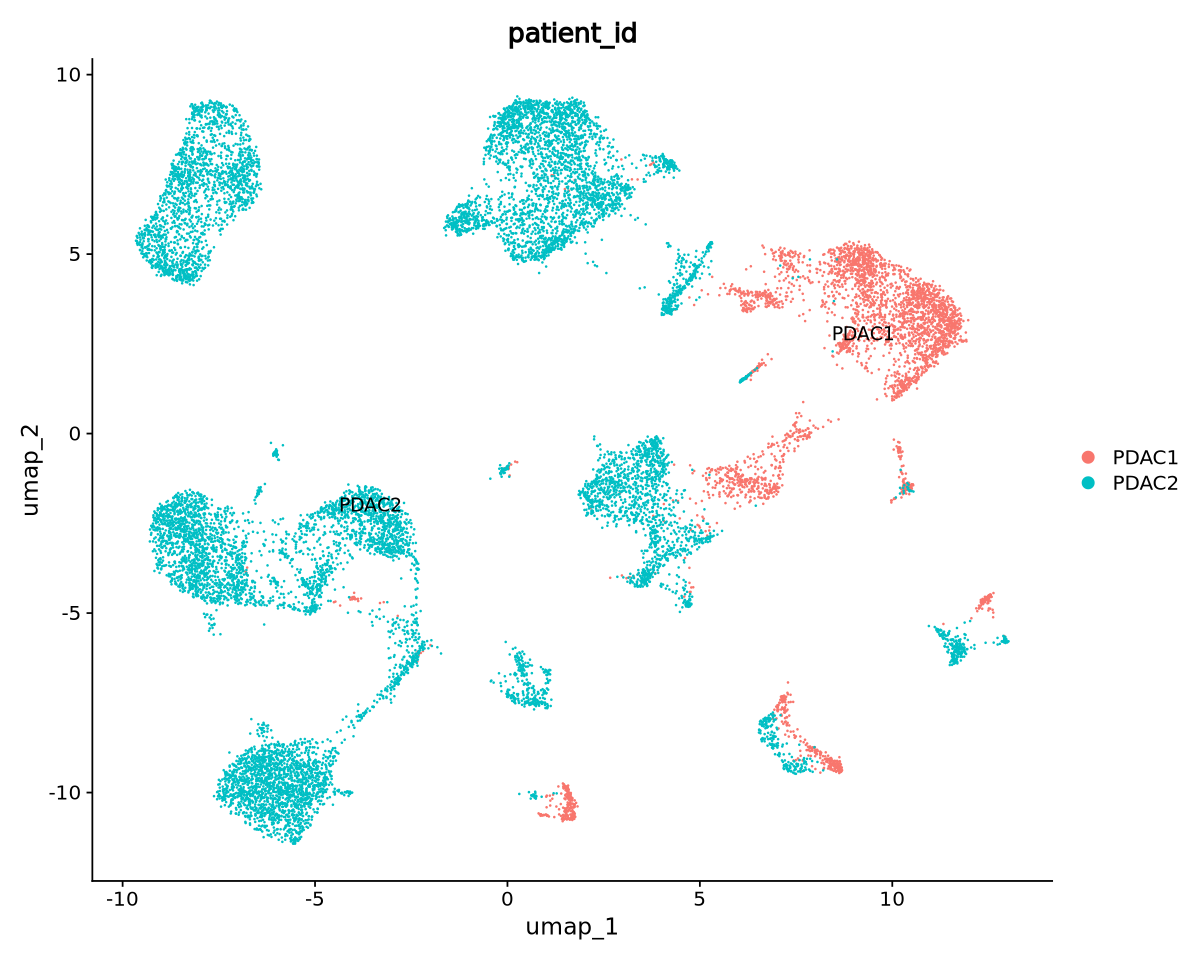

In [18]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(PDAC, reduction = "umap")
DimPlot(PDAC, reduction = "umap", label=TRUE)
DimPlot(PDAC, reduction = "umap", label=TRUE, group = "patient_id")

### populations quite different per patient, keep in mind below

In [19]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(PDAC, file = "/scratch/user/s4436039/scdata/GSE231535/GSE231535.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

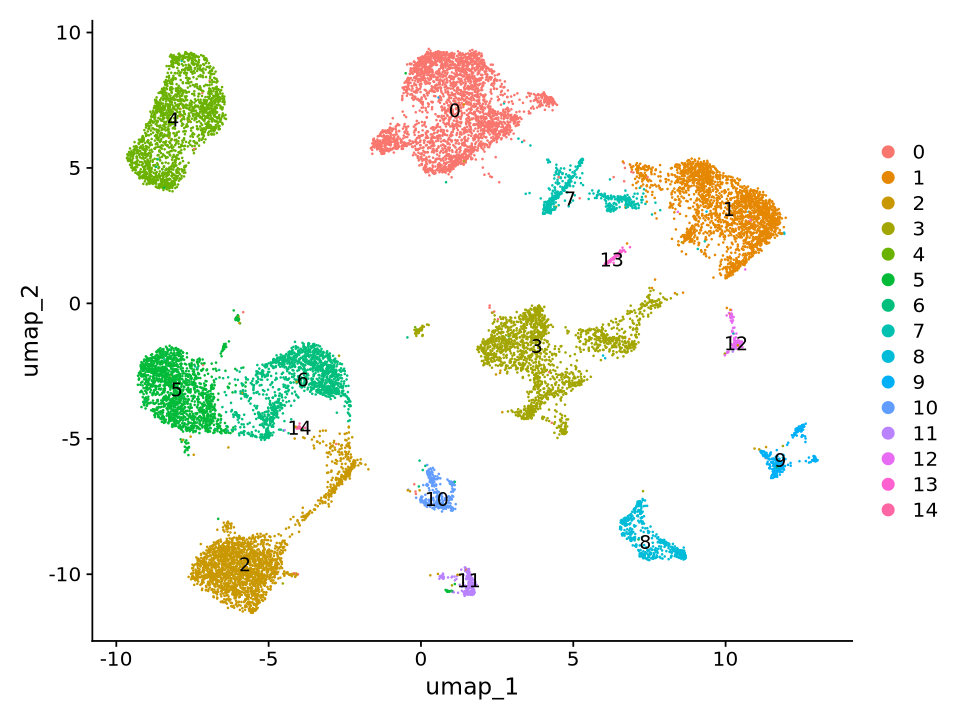

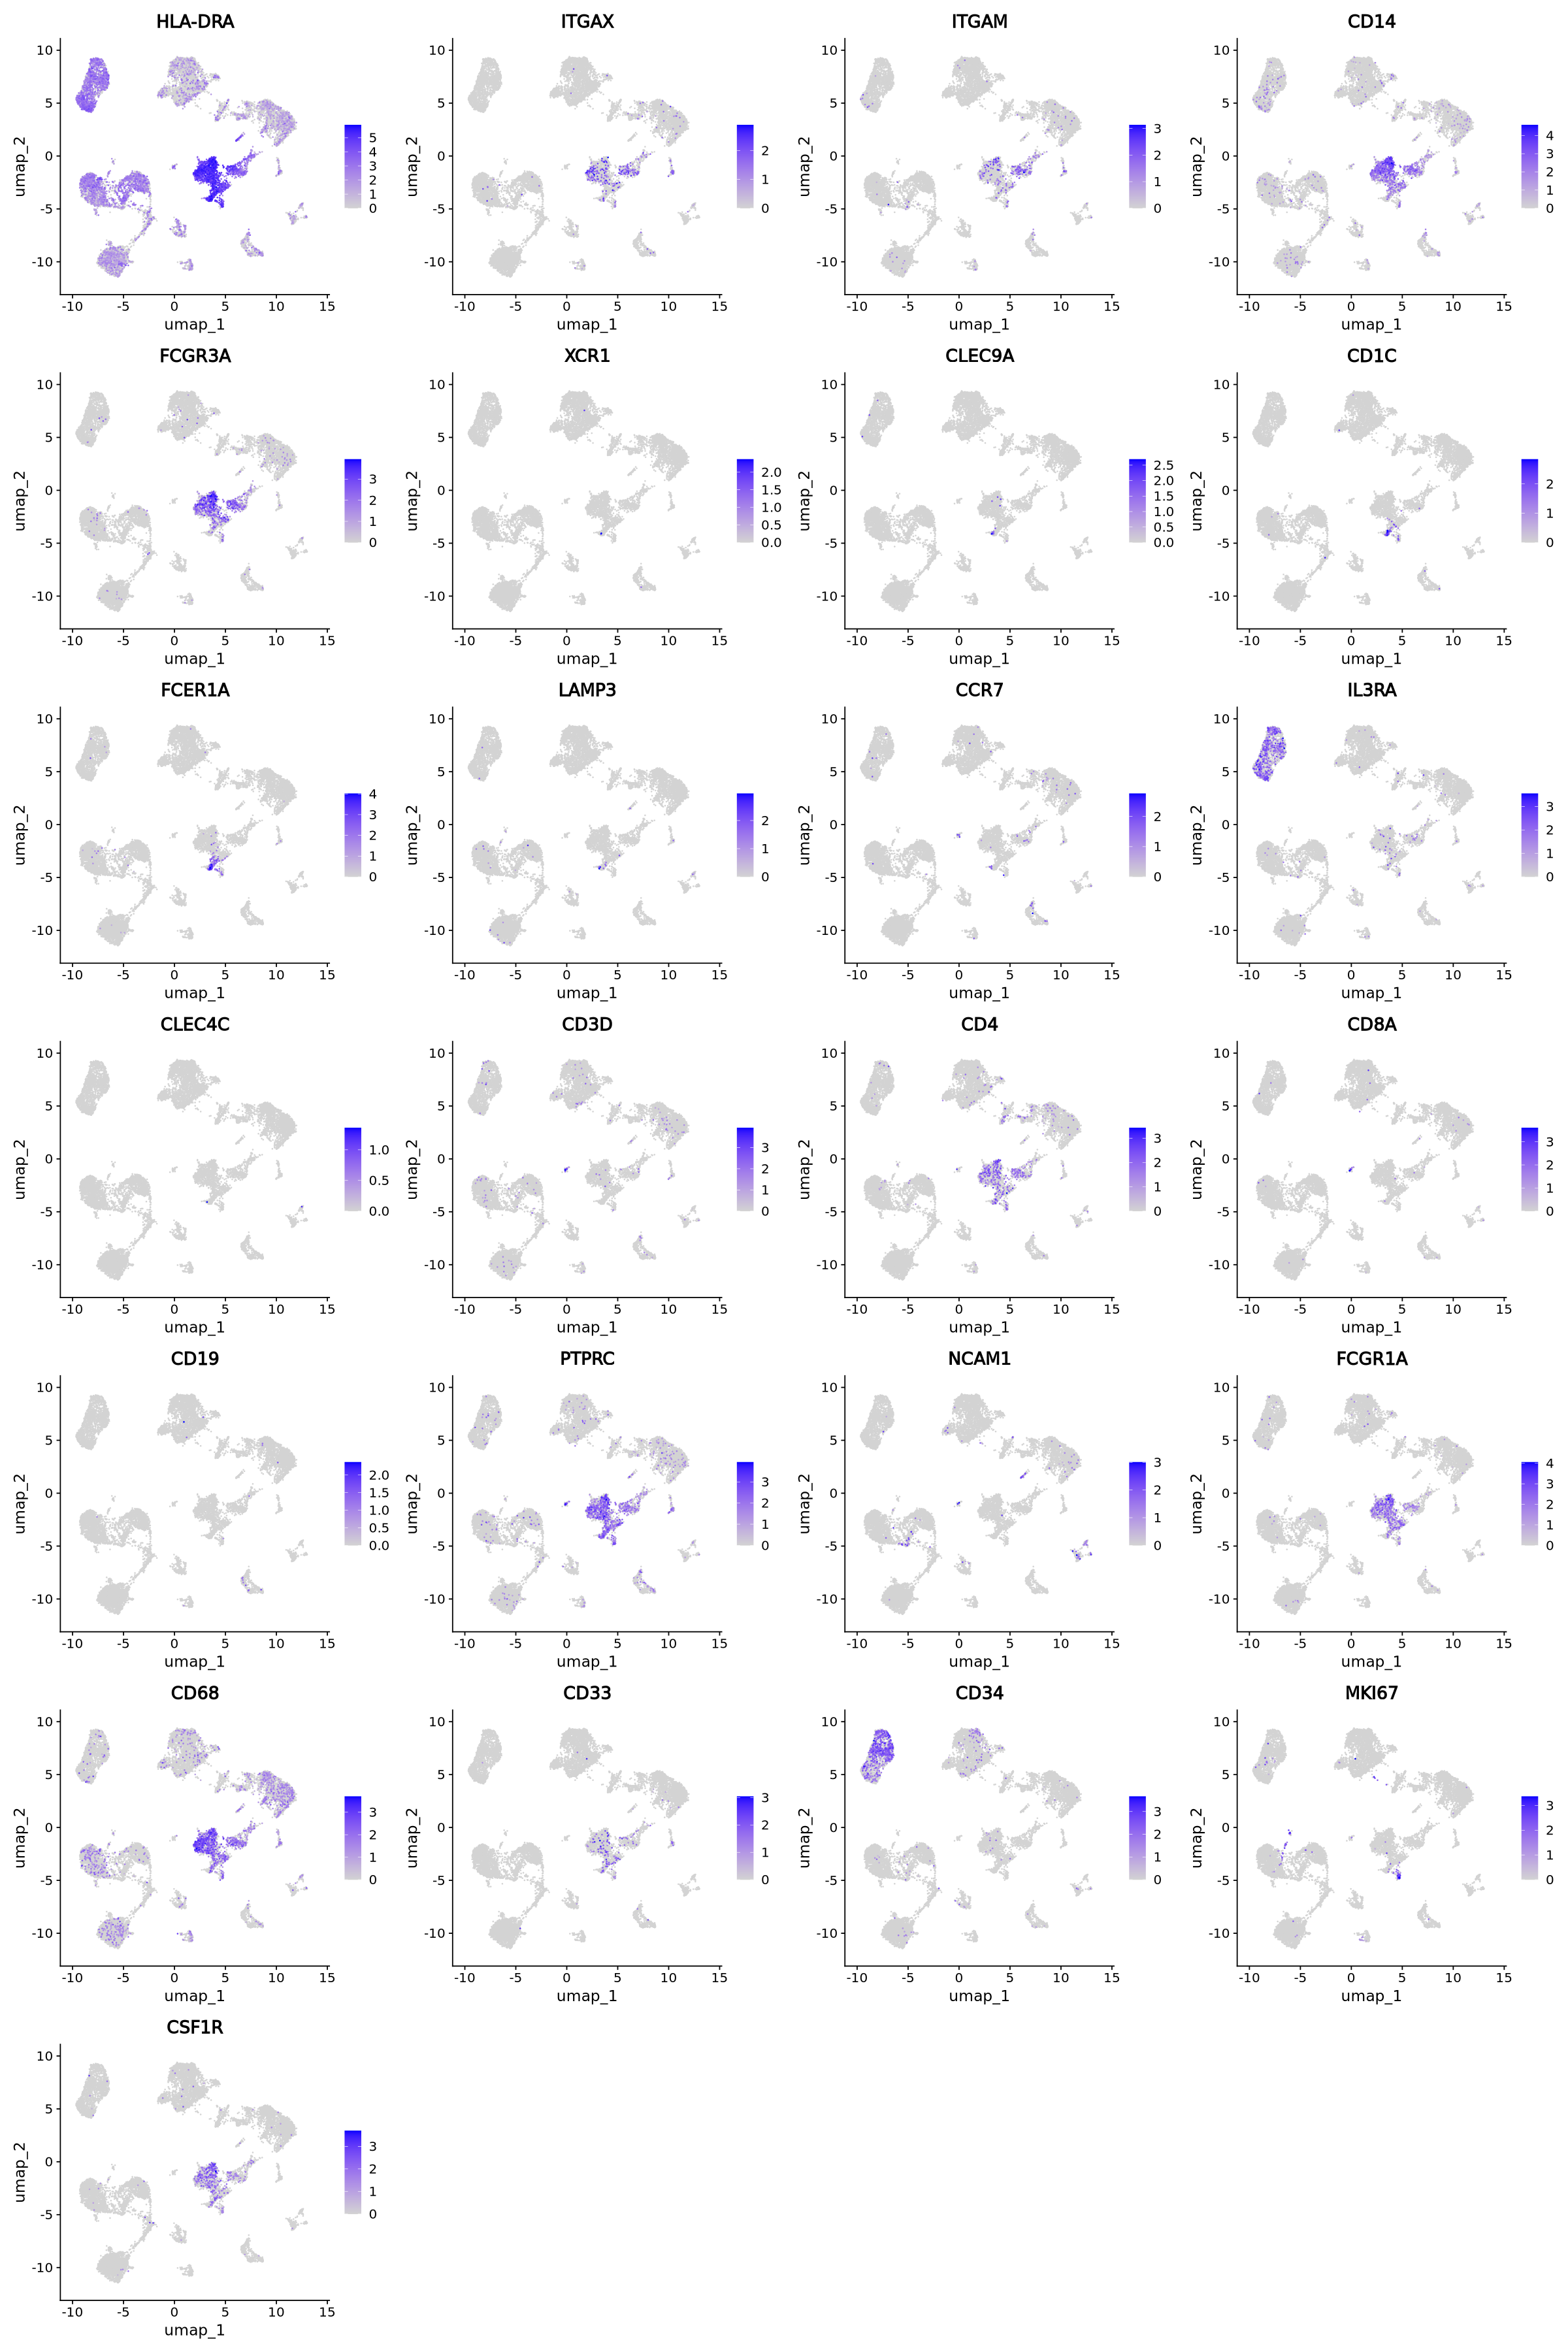

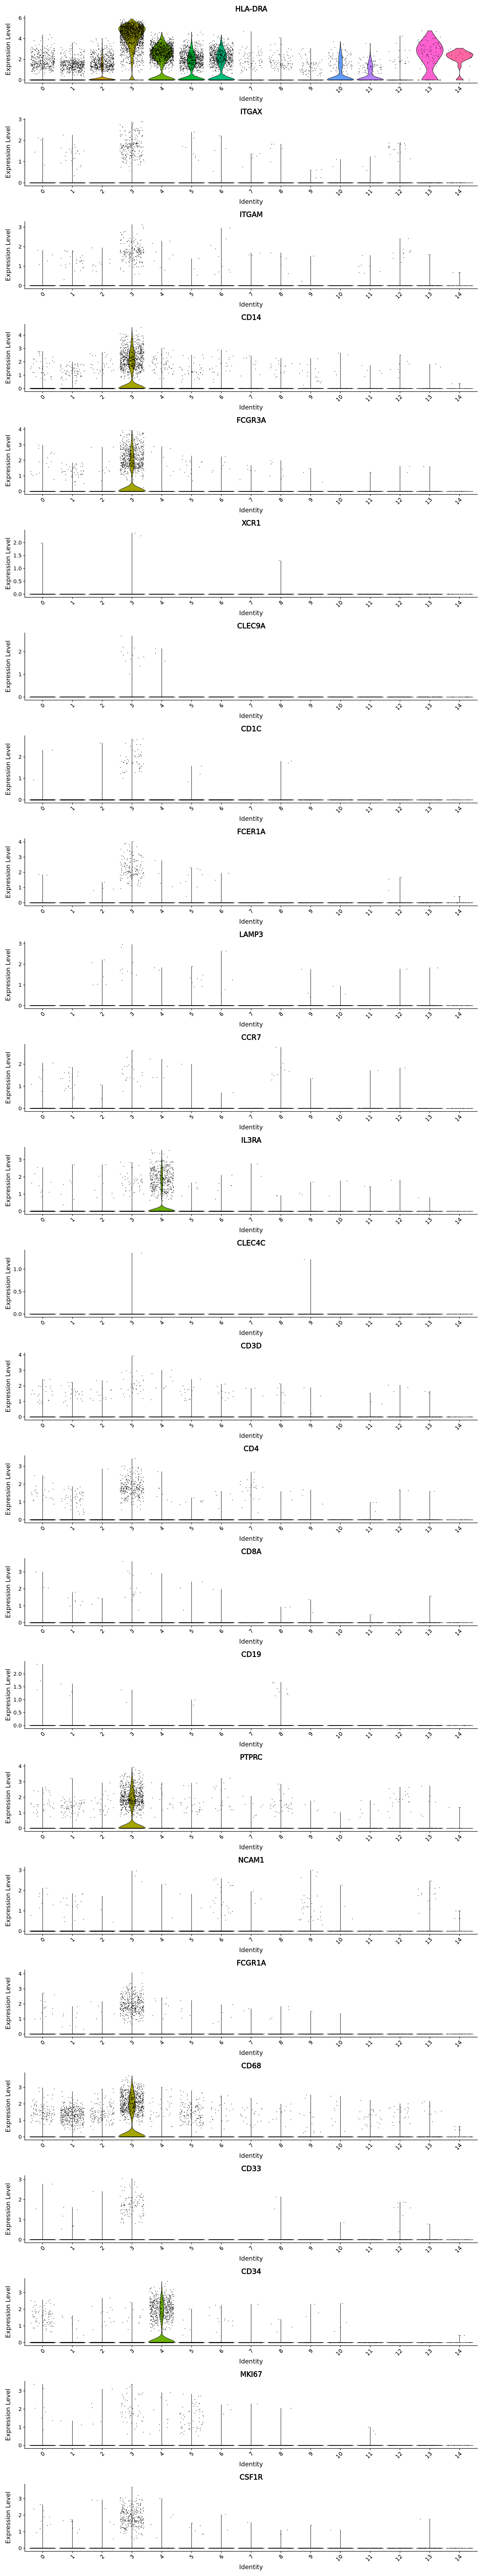

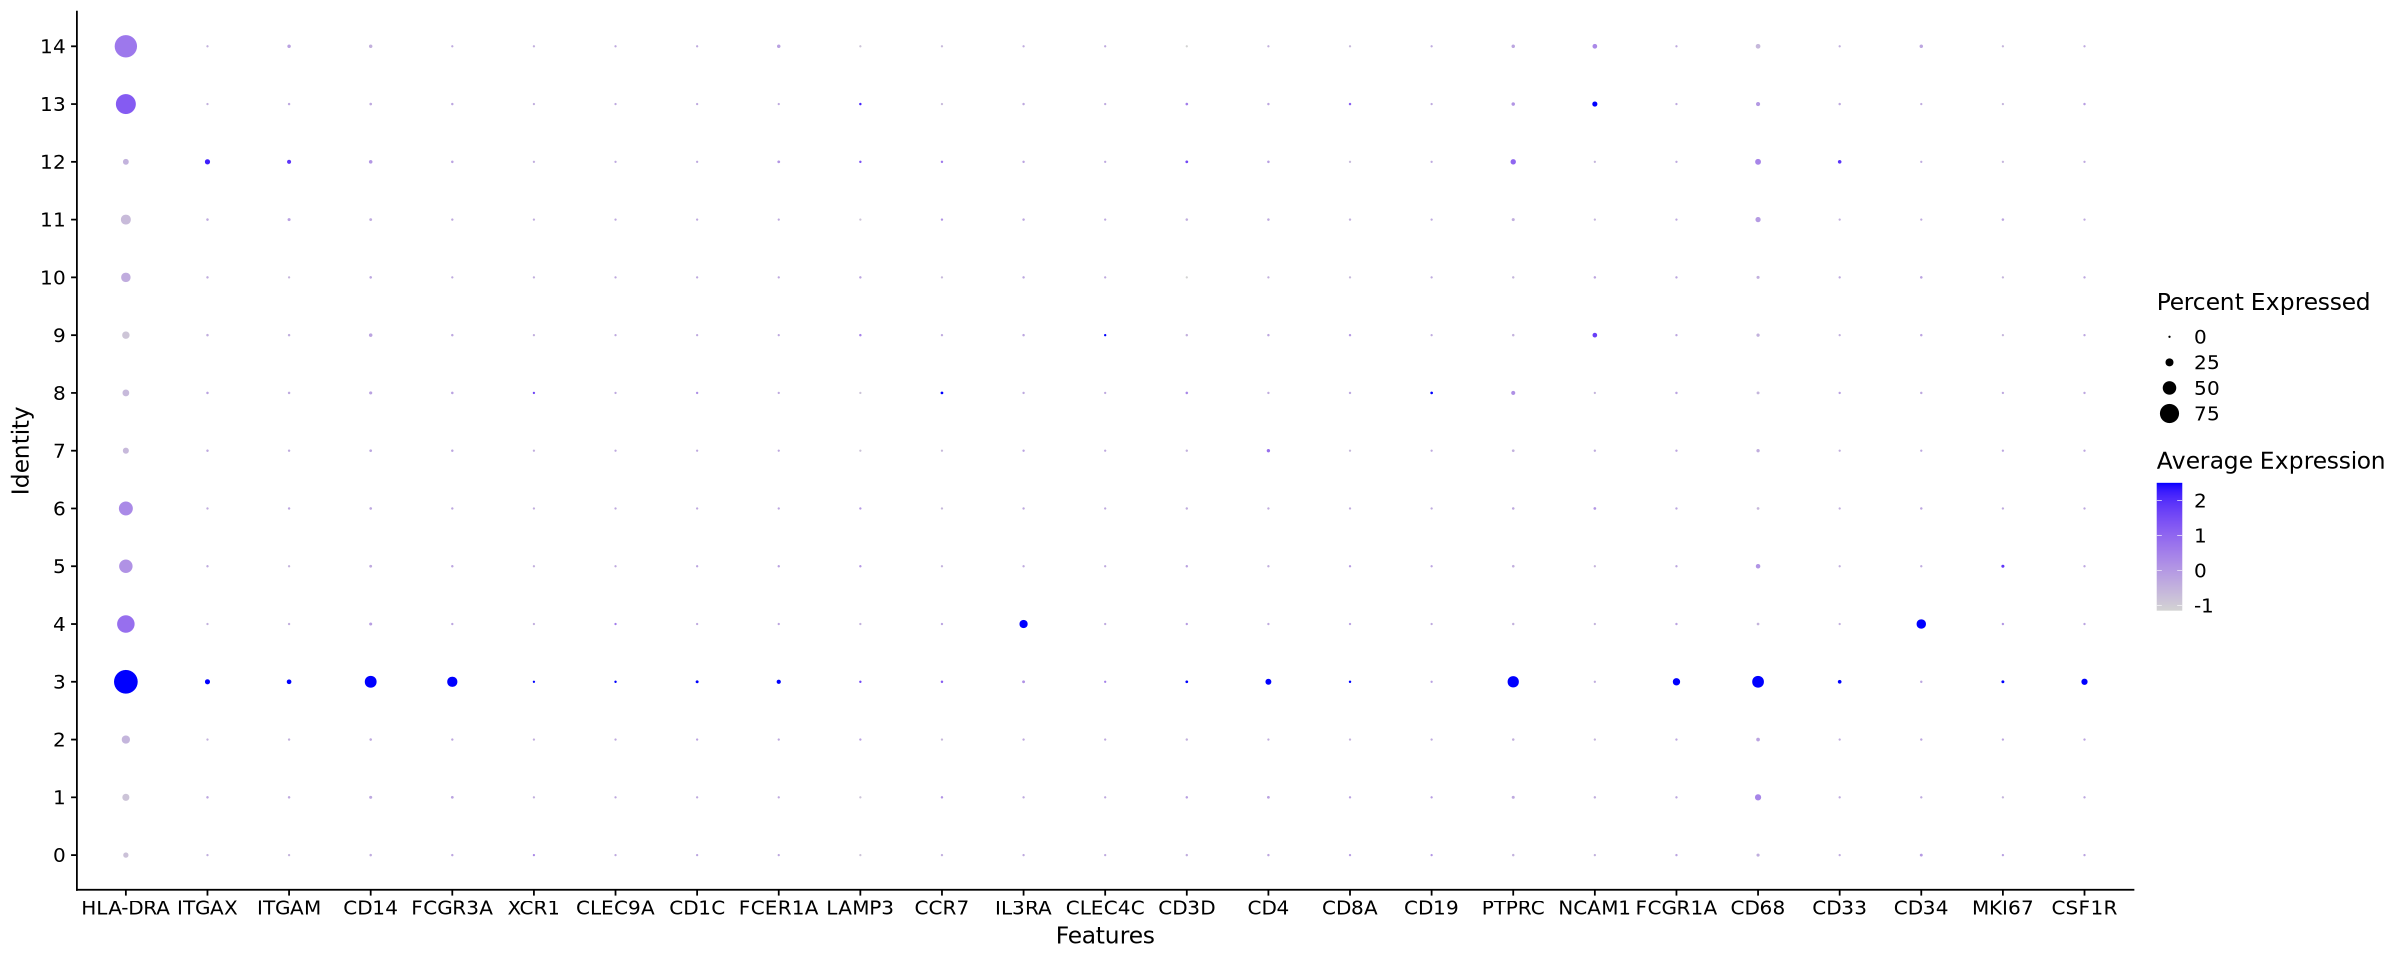

In [20]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(PDAC, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like cluster 3 is the myeloid cells, now subsetting out this cluster

In [21]:
head(PDAC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE231535_PDAC1_AAACCTGAGACGCACA-1 GSE231535  1838        668        
GSE231535_PDAC1_AAACCTGAGGCATGGT-1 GSE231535  7799       2041        
GSE231535_PDAC1_AAACCTGAGGCATGTG-1 GSE231535  2589        895        
GSE231535_PDAC1_AAACCTGCAATAACGA-1 GSE231535  3585       1333        
GSE231535_PDAC1_AAACCTGCAGGTGCCT-1 GSE231535  4576       1167        
GSE231535_PDAC1_AAACCTGGTCAGTGGA-1 GSE231535  2297        723        
                                   sample_type cancer_type patient_id
GSE231535_PDAC1_AAACCTGAGACGCACA-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGAGGCATGGT-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGAGGCATGTG-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGCAATAACGA-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGCAGGTGCCT-1 tumour      PDAC        PDAC1     
GSE231535_PDAC1_AAACCTGGTCAGTGGA-1 tumour      PDAC        PDAC1     
                                   sample_id       percent.mt RNA_snn_res.0.2
GSE231535_PDAC1_AAACCTGAGACGCACA-1 GSE231535_PDAC1  4.352557  1              
GSE231535_PDAC1_AAACCTGAGGCATGGT-1 GSE231535_PDAC1  1.551481  1              
GSE231535_PDAC1_AAACCTGAGGCATGTG-1 GSE231535_PDAC1 15.334106  1              
GSE231535_PDAC1_AAACCTGCAATAACGA-1 GSE231535_PDAC1  3.040446  3              
GSE231535_PDAC1_AAACCTGCAGGTGCCT-1 GSE231535_PDAC1  1.988636  1              
GSE231535_PDAC1_AAACCTGGTCAGTGGA-1 GSE231535_PDAC1 14.627775  3              
                                   seurat_clusters
GSE231535_PDAC1_AAACCTGAGACGCACA-1 1              
GSE231535_PDAC1_AAACCTGAGGCATGGT-1 1              
GSE231535_PDAC1_AAACCTGAGGCATGTG-1 1              
GSE231535_PDAC1_AAACCTGCAATAACGA-1 3              
GSE231535_PDAC1_AAACCTGCAGGTGCCT-1 1              
GSE231535_PDAC1_AAACCTGGTCAGTGGA-1 3

In [22]:
myeloid_PDAC <- subset(PDAC, subset = RNA_snn_res.0.2 %in% c("3"))

In [23]:
myeloid_PDAC

An object of class Seurat 
45068 features across 1832 samples within 1 assay 
Active assay: RNA (45068 features, 2000 variable features)
 5 layers present: counts.1, counts.2, data.1, data.2, scale.data
 2 dimensional reductions calculated: pca, umap

In [24]:
saveRDS(myeloid_PDAC, "/scratch/user/s4436039/scdata/GSE231535/GSE231535_myeloid.RDS")

#### Following the above then need to move entire GSE231535 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE231535/ /QRISdata/Q5935/nikita/scdata/GSE231535
```